In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def predict2L(x, y, reg, degree):
    regTerm = reg * np.identity(degree+1)
    term1 = np.linalg.inv(np.matmul(x.T, x) + regTerm)
    term2 = np.matmul(x.T, y)
    w = np.matmul(term1, term2)
    return w

In [3]:

#should use poly1d instead
def PLR(degree, x):
    ft = np.expand_dims(x, axis=1)
    for i in range(0, degree+1): 
        ft = np.insert(ft, i, x**(i), axis=1)
    ft = np.delete(ft, -1, axis=1)
    return ft

In [4]:
def calculatePrediction(ex, w):
        result = 0
        for i in range(len(w)):
            result += np.array(ex)**i * w[i]
        return result

In [5]:
def MSE(predictedY, actualY,w ,lam):
    error = 0
    for i in range(0, len(actualY)):
        error += (predictedY[i] - actualY[i])**2
    error /= len(actualY)
    error = error + lam*np.dot(w.T, w)/2

    return error

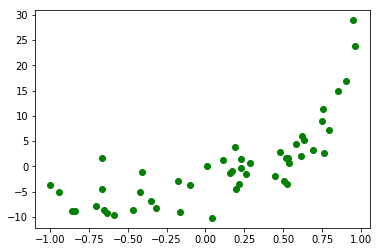

In [6]:
dir =  os.path.dirname(os.path.realpath('__file__'))

testFilePath = dir +  "/Datasets/Dataset_1_test.csv"
trainFilePath = dir +  "/Datasets/Dataset_1_train.csv"
validFilePath = dir +  "/Datasets/Dataset_1_valid.csv"

testFile = pd.read_csv(testFilePath, header=None)
testFile = testFile.drop([2], axis=1) 
testX = testFile[0]
testY = testFile[1]

trainFile = pd.read_csv(trainFilePath, header=None)
trainFile = trainFile.drop([2], axis=1)
trainX = trainFile[0]
trainY = trainFile[1]

validFile = pd.read_csv(validFilePath, header=None)
validFile = validFile.drop([2], axis=1)
validX = validFile[0]
validY = validFile[1]


plt.plot(trainX,trainY,'go')
plt.show()

In [7]:
trainFt = PLR(20, trainX)
validFT = PLR(20, validX)

Training Error:  6.474929236298607
Validation error:  1423.5291860503262


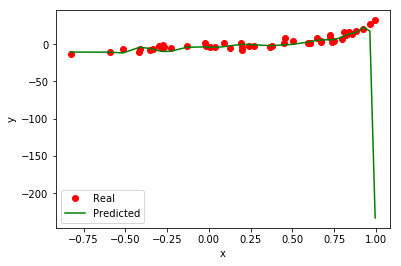

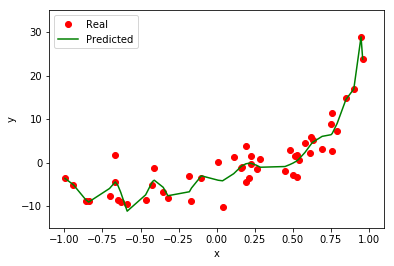

In [8]:
#
w = predict2L(trainFt, trainY, 0, 20)
predictedTrainY = calculatePrediction(trainX, w)
predictedValidY = calculatePrediction(validX, w)


print("Training Error: ", MSE(predictedTrainY, trainY, w, 0))
print("Validation error: ", MSE(predictedValidY,validY, w , 0 ))

plt.figure(4)
plt.plot(np.sort(validX), validY[np.argsort(validX)], 'ro', label="Real")
line = plt.plot(np.sort(validX), predictedValidY[np.argsort(validX)])
plt.setp(line, linewidth=1.5, color='green', label="Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=3)
plt.show()


plt.figure(1)
plt.axis([-1.10, 1.10, -15.00, 35.00])
plt.plot(np.sort(trainX), trainY[np.argsort(trainX)], 'ro', label="Real")
line = plt.plot(np.sort(trainX), predictedTrainY[np.argsort(trainX)], label="Predicted")
plt.setp(line, linewidth=1.5, color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=2)
plt.show()



In [9]:
#part 2

lam = np.linspace(0.001, 1, 1000)
lam

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
       0.127, 0.128,

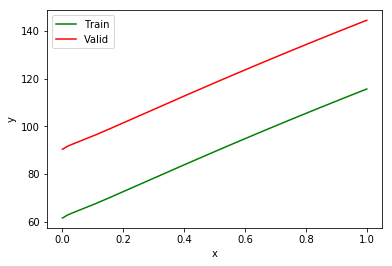

In [10]:
tMse = []
vMse = []

for i in range(len(lam)):
    w = predict2L(trainFt, trainY, lam[i], 20)
    tMse.append(MSE(trainX, trainY, w, lam[i]))
    vMse.append(MSE(validX, validY, w, lam[i]))

plt.plot(lam, tMse, c='g', label="Train")
plt.plot(lam, vMse, c='r', label="Valid")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=2)
#plt.xlim(-0.1, 1)
#plt.ylim(10, 90)

plt.show()